In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import cifar10

In [2]:
def residual_block(filters):
  "Defines a residual block."
  model = Sequential()
  model.add(Conv2D(filters, (3,3), padding = 'same', activation='relu'))
  model.add(Conv2D(filters, (3,3), padding = 'same', activation='relu'))
  return model

In [3]:
def build_resnet(depth):
  """Defines a ResNet model with the speicfied depth"""
  model = Sequential()
  model.add(Conv2D(64, (7,7), padding = 'same', activation = 'relu', input_shape = (32,32,3)))
  model.add(MaxPooling2D((3,3), strides = (2,2)))

  for i in range(depth-2):
    model.add(residual_block(15))


  model.add(Conv2D(10, (1,1), padding = 'same', activation = 'relu'))
  model.add(Flatten())
  model.add(Dense(10, activation = 'softmax'))

  return model



In [4]:
model = build_resnet(30)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 sequential_1 (Sequential)   (None, 15, 15, 15)        10695     
                                                                 
 sequential_2 (Sequential)   (None, 15, 15, 15)        4080      
                                                                 
 sequential_3 (Sequential)   (None, 15, 15, 15)        4080      
                                                                 
 sequential_4 (Sequential)   (None, 15, 15, 15)        4080      
                                                        

In [6]:
from keras.utils import plot_model

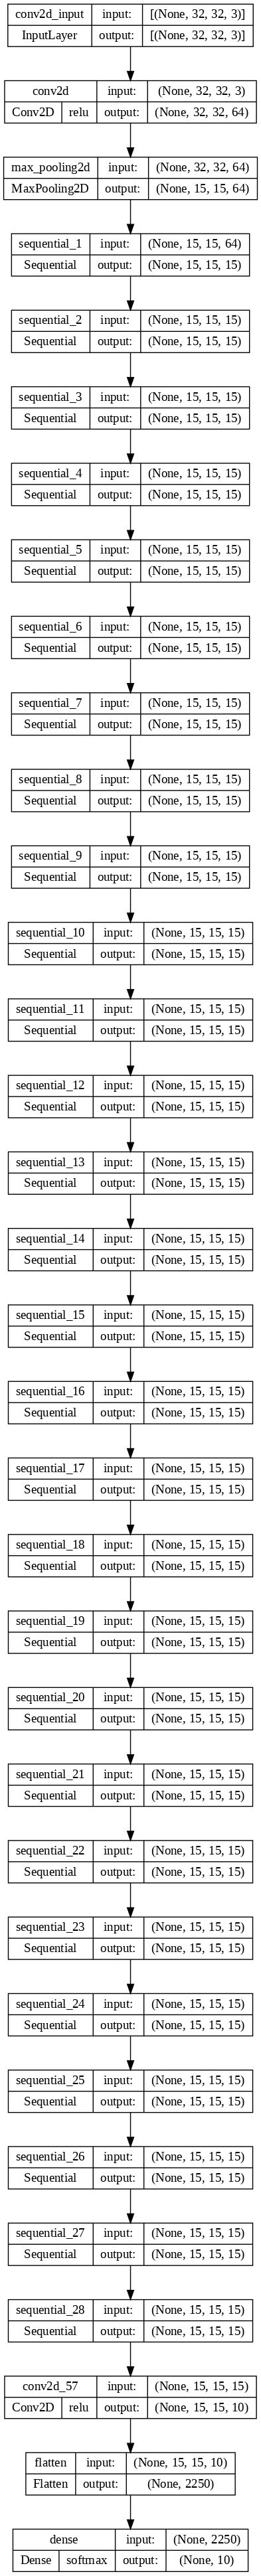

In [7]:
plot_model(model, show_layer_activations=True, show_shapes = True, show_layer_names=True, dpi = 100)

In [8]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics= [ 'accuracy'])

In [11]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 61s 23ms/step - loss: 2.3028 - accuracy: 0.0988
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.3027 - accuracy: 0.1008
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.3028 - accuracy: 0.0960
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0967
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 10/10
1563/1563 [==============================] - 35s 23m

In [12]:
model.evaluate(x_test, y_test, batch_size = 1)

10000/10000 [==============================] - 47s 5ms/step - loss: 2.3027 - accuracy: 0.1000


[2.302654504776001, 0.10000000149011612]